# Relative Vaccinations (Absolute Vaccination/Population Size)

Countries: France, United Kingdom, Hong Kong

Pranav Atul Patwardhan (419148)

In [74]:
#Importing required libraries:
import pandas as pd
import requests
import json
import datetime as datetime
import matplotlib.pyplot as plt

In [55]:
#Setting limit to maximum rows displayed:
pd.set_option('display.max_rows', 500)

In [56]:
# Requesting the Covid Cases data from our world in data webiste as a json object:
data_Vax=requests.get('https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.json')

#Dumping all data from json into a variable:
json_object_vax=json.loads(data_Vax.content)

In [57]:
# create an empty dictionary
dict_from_list = {}

# for loop to convert list of dict
# to dict of list
for item in json_object_vax:
	name = item['country']
	dict_from_list[name] = item

# Displaying the keys of the dictonary:
dict_from_list.keys()

dict_keys(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'F

In [58]:
#Separating dictonary of France from list and adding it to new list:
country_FRA=dict_from_list['France']

#Separating the list that contains the data we need from the United Kingdom dictonary:
country_FRA_data=country_FRA['data']

In [59]:
#Creating an empty dictonary to get data(date, vaccination):
dictionary_of_FRA_date_vax={}

#Creating dictonary from the list:
for item in country_FRA_data:
	name = item['date']
	dictionary_of_FRA_date_vax[name] = item

In [60]:
#Creating an empty list:
inter_list_FRA=[]

#Adding all the keys from data dictonary to an empty list:
for key in dictionary_of_FRA_date_vax:
	inter_list_FRA.append(dictionary_of_FRA_date_vax[key])

In [61]:
#Converting list to dataframe:
pd_FRA_inter=pd.DataFrame(inter_list_FRA)

#Renaming the label total_vaccinations column to 'France ratio vaccination:population' (data it holds while plotting)
pd_FRA_inter = pd_FRA_inter.rename(columns={'total_vaccinations':'FRA_ratio_vax_pop'})

#Setting the index of the dataframe to date:
pd_FRA_inter.set_index('date')

#Separating the data columns that we need for the plot (date, total_vaccinations):
pd_FRA_fin= pd_FRA_inter.iloc[:, [0,1]]

#Checking the data types of the final dataframe for France:
pd_FRA_fin.dtypes

date                 object
FRA_ratio_vax_pop     int64
dtype: object

Requesting data that contains population from another web-source so that the population value stays up-to-date:

In [62]:
#Requesting the json containing the population data so as the population number would always stay up-to-date:
data_cases=requests.get('https://covid.ourworldindata.org/data/owid-covid-data.json')

#Loading the json object for extrating population data:
json_object_cases=json.loads(data_cases.content)

Separating the population of France from the above imported json data:

In [63]:
pop_FRA=json_object_cases['FRA']['population']

In [64]:
pd_FRA_fin['FRA_ratio_vax_pop']=pd_FRA_fin['FRA_ratio_vax_pop'].div(pop_FRA)

/var/folders/hc/6zc630lj787bkjt8wd6q8k4w0000gn/T/ipykernel_4202/59905375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_FRA_fin['FRA_ratio_vax_pop']=pd_FRA_fin['FRA_ratio_vax_pop'].div(pop_FRA)


Testing weather the dataframe created gives a valid plot for one country:

<AxesSubplot:xlabel='date'>

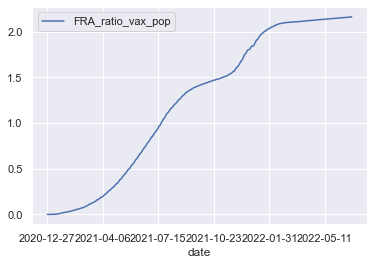

In [65]:
pd_FRA_fin.plot(x='date', y='FRA_ratio_vax_pop')

Following above steps for Great Britain/United Kingdom:

In [70]:
#Separating dictonary of United Kingdom from list and adding it to new list:
country_GBR=dict_from_list['United Kingdom']

#Separating the list that contains the data we need from the United Kingdom dictonary:
country_GBR_data=country_GBR['data']

#Creating an empty dictonary to get data(date, vaccination):
dictionary_of_GBR_date_vax={}

#Creating dictonary from the list:
for item in country_GBR_data:
	name = item['date']
	dictionary_of_GBR_date_vax[name] = item

#Creating an empty list:
inter_list_GBR=[]

#Adding all the keys from data dictonary to an empty list:
for key in dictionary_of_GBR_date_vax:
	inter_list_GBR.append(dictionary_of_GBR_date_vax[key])


#Converting list to dataframe:
pd_GBR_inter=pd.DataFrame(inter_list_GBR)

#Renaming the label total_vaccinations column to 'United Kingdom ratio vaccination:population' (data it holds while plotting)
pd_GBR_inter = pd_GBR_inter.rename(columns={'total_vaccinations':'GBR_ratio_vax_pop'})

#Setting the index of the dataframe to date:
pd_GBR_inter.set_index('date')

#Separating the data columns that we need for the plot (date, total_vaccinations):
pd_GBR_fin= pd_GBR_inter.iloc[:, [0,1]]

#Getting the total population of United Kingdom from the above requested json data:
pop_GBR=json_object_cases['GBR']['population']

#Dividing the vaccinated people by total population to get the ratio:
pd_GBR_fin['GBR_ratio_vax_pop']=pd_GBR_fin['GBR_ratio_vax_pop'].div(pop_GBR)

/var/folders/hc/6zc630lj787bkjt8wd6q8k4w0000gn/T/ipykernel_4202/3831804719.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_GBR_fin['GBR_ratio_vax_pop']=pd_GBR_fin['GBR_ratio_vax_pop'].div(pop_GBR)


Following the above steps for Hong Kong:

In [71]:
#Separating dictonary of Hong Kong from list and adding it to new list:
country_HKG=dict_from_list['Hong Kong']

#Separating the list that contains the data we need from the Hong Kong dictonary:
country_HKG_data=country_HKG['data']

#Creating an empty dictonary:
dictionary_of_HKG_date_vax={}

#Creating dictonary from the list:
for item in country_HKG_data:
	name = item['date']
	dictionary_of_HKG_date_vax[name] = item

#Creating an empty list:
inter_list_HKG=[]

#Adding all the keys from data dictonary to an empty list:
for key in dictionary_of_HKG_date_vax:
	inter_list_HKG.append(dictionary_of_HKG_date_vax[key])


#Converting list to dataframe:
pd_HKG_inter=pd.DataFrame(inter_list_HKG)

#Renaming the label total_vaccinations column to 'Hong Kong ratio vaccination:population' (data it holds while plotting)
pd_HKG_inter = pd_HKG_inter.rename(columns={'total_vaccinations':'HKG_ratio_vax_pop'})

#Setting the index of the dataframe to date:
pd_HKG_inter.set_index('date')

#Converting the date in string format to datetime format:
pd.to_datetime(pd_HKG_inter['date'],format='%Y-%m-%d')

#Separating the data columns that we need for the plot (date, total_vaccinations):
pd_HKG_fin= pd_HKG_inter.iloc[:, [0,1]]

#Getting the total population of Hong Kong:
pop_HKG=json_object_cases['HKG']['population']

#Dividing the vaccinated people by total population to get the ratio:
pd_HKG_fin['HKG_ratio_vax_pop']=pd_HKG_fin['HKG_ratio_vax_pop'].div(pop_HKG)

/var/folders/hc/6zc630lj787bkjt8wd6q8k4w0000gn/T/ipykernel_4202/1154974127.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_HKG_fin['HKG_ratio_vax_pop']=pd_HKG_fin['HKG_ratio_vax_pop'].div(pop_HKG)


In [72]:
#Creating final dataframe for plot
final_plot = pd.concat([pd_FRA_fin, pd_GBR_fin, pd_HKG_fin],sort=False)

#Converting date from string to datetime object type:
final_plot['date']=pd.to_datetime(final_plot['date'])

Plotting the graph:

x axis is date

y axis is ratio of vaccination/total population

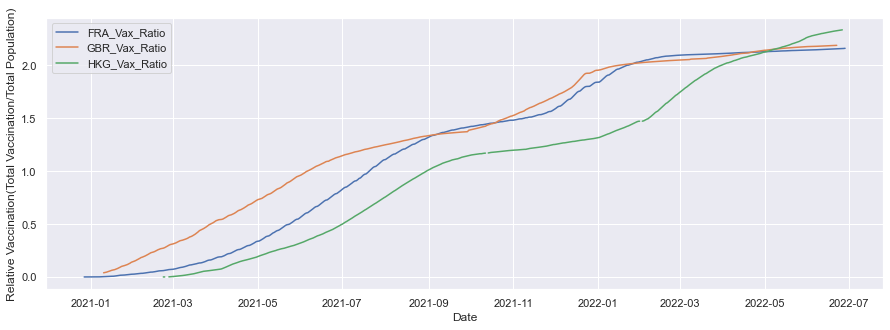

In [76]:
#Defining size of the graph:
plt.figure(figsize=(15,5))

# Plot for France:
plt.plot(final_plot["date"],final_plot["FRA_ratio_vax_pop"],label="FRA_Vax_Ratio")

#Plot for Great Britain:
plt.plot(final_plot["date"],final_plot["GBR_ratio_vax_pop"],label="GBR_Vax_Ratio")

#Plot for Hong Kong:
plt.plot(final_plot["date"],final_plot["HKG_ratio_vax_pop"],label="HKG_Vax_Ratio")

#Creating label for x-axis:
plt.xlabel('Date')

#Creating label for y-axis:
plt.ylabel('Relative Vaccination(Total Vaccination/Total Population)')

#Print the legend:
plt.legend()

# Fin